![img](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png) Filippo Miatto (2020) 

# 2 Automatic Differentiation

## 2.1 What does Automatic Differentiation do?
AD is a meta-algorithm. It takes an algorithm and it produces a new one for you:

$$
AD(\mathrm{algo}_\mathrm{in}) = \mathrm{algo}_\mathrm{out}
$$

If the input algorithm had type $(a\rightarrow b)$ where $a$ and $b$ are vector spaces of dimension $m$ and $n$, the output algorithm has type $(a\rightarrow (a\multimap b))$. You guessed it: the algorithm returned by AD is the derivative of the input algorithm. What this means is that if we evaluate $\mathrm{algo}_\mathrm{out}$ on an input $x\in a$, it must return a linear map from $a$ to $b$, i.e. a matrix of shape $n\times m$. As we said earlier, this map is the linear approximation of $\mathrm{algo}_\mathrm{in}$ around $x$ and it can be used for optimization.

## 2.2 Using AD for optimization
AD is implemented in several libraries: Tensorflow (since version 2) and Pytorch are the two most well-known from the world of Machine Learning and AI. Autograd and Jax are other possibilities. We will be using Jax, which is an AD library develped by Google. It makes it easy to apply AD to your projects because it has a module that can simply replace `numpy` and everything should work out of the box. Also, jax can run on GPUs and TPUs natively, so if you have one of those all the better!

If you are on colab, jax is already available to import. If you are working locally, you'll need to install it by following the instructions on [the Github page of the project](https://github.com/google/jax).

Here's how we would have used it on the problem in Activity 3:

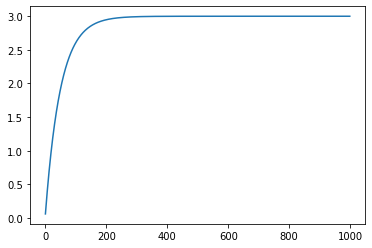

In [ ]:
from jax import numpy as np # from now on, np is not numpy, but jax.numpy
from jax import grad, jit
from matplotlib import pyplot as plt

def f(x):
    return (x-3.0)**2

f_prime = grad(f) # use jit(grad(f)) if you want the faster, compiled version of grad(f)

x_values = []
e = 0.01
x = 0.0
for step in range(1000):
    x -= e*f_prime(x)
    x_values.append(x)
    
plt.plot(x_values);

#### Activity 4: apply AD to a more complex example (30 minutes)
Suppose you have been given a bunch of data points $(x_i, y_i)$ and you want to fit a line $y = mx + b$ through them. This is a perfect application of Gradient Descent!

Use this function to generate $N$ points (say, $N=20$):
```python
from numpy.random import normal as noise
def points(N):
    m = 2
    b = -4
    return [(x, m*x + b + 3*noise()) for x in range(N)]
```

1. code a cost function $C(m,b)=\frac{1}{N}\sum_i (y_i - m x_i - b)^2$
2. use jax to get the gradient of $C$ with respect to $m$ and $b$ (use `argnums=[0,1]` to get the gradient with respect to both $m$ and $b$)
3. use GD to find the optimal $m$ and $b$